# Practical Data Visualization with Python - Part 1: Why We Visualize

## Setup

In [1]:
%%capture
# capturing above because there are a few useless warnings that might pop up, version-depending

# basic packages:
import numpy as np
import pandas as pd
import datetime
from scipy import stats

# packages for viz:
# plotly express
import plotly_express as px
# matplotlib
import matplotlib.pyplot as plt
# seaborn and default seaborn settings set for matplot lib charts
import seaborn as sns; sns.set()
# base plotly packages
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots
# turns on plotly notebook mode
init_notebook_mode()
from plotly import graph_objs as go
# altair
import altair as alt
# turns on altair renderer -- jlab is default
alt.renderers.enable('jupyterlab')
# bokeh
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
# plotnine
from plotnine import *

In [2]:
# there are a few warnings I want to silence throughout that are due to unimportant np deprecations 
np.warnings.filterwarnings('ignore')

In [3]:
# store the datetime of the most recent running of this notebook as a form of a log
most_recent_run_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M")
f"This notebook was last executed on {most_recent_run_datetime}"

'This notebook was last executed on 2019-08-08 18:39'

In [4]:
# pulling in our main data; for more info on the data, see the "data_prep_nb.ipynb" file
main_df = pd.read_csv(filepath_or_buffer='../data/jan_and_dec_17_acqs.csv')

# taking a peek at our data
main_df.head()

,loan_id,orig_chn,seller_name,orig_rt,orig_amt,orig_trm,orig_dte,frst_dte,oltv,ocltv,...,occ_stat,state,zip_3,mi_pct,product_type,cscore_c,mi_type,relocation_flg,cscore_min,orig_val
0,100020736692,B,"CALIBER HOME LOANS, INC.",4.875,492000,360,12/2017,02/2018,75,75,...,I,CA,920,NaN,FRM,NaN,NaN,N,757.0,656000.000000
1,100036136334,R,OTHER,2.750,190000,180,12/2017,01/2018,67,67,...,P,MD,206,NaN,FRM,798.0,NaN,N,797.0,283582.089552
2,100043912941,R,OTHER,4.125,68000,360,12/2017,02/2018,66,66,...,P,OH,432,NaN,FRM,NaN,NaN,N,804.0,103030.303030
3,100057175226,R,OTHER,4.990,71000,360,12/2017,02/2018,95,95,...,P,NC,278,30.0,FRM,NaN,1.0,N,696.0,74736.842105
4,100060715643,R,OTHER,4.500,180000,360,12/2017,02/2018,75,75,...,I,WA,983,NaN,FRM,NaN,NaN,N,726.0,240000.000000


## Why We Visualize

### The power of visual data representation and storytelling. 

Let's start by broaching the subject of the justification for all of the rest of the material in this repo: why do we bother with data visualization at all? There are plenty of excellent, longer form treatments of this question--one of my favorites of which is [Jake VanderPlas' talk from PyCon 2019](https://www.youtube.com/watch?v=vTingdk_pVM)--but for now, suffice it to say this:

> We visualize data because encoding data into a visual representation can often lead to insights that we might not glean intuitively, if at all, without visualization.  

To probe this concept even further, let's turn to an excellent quote from famous statistician [Frank Anscombe](https://en.wikipedia.org/wiki/Frank_Anscombe), who stated that we should always:

> "make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding."

Frank reinforced this lesson with a now-famous dataset he concocted, dubbed "Anscombe's Quartet," the main thrust of which can be gleaned from the image below, courtesy of [Justin Matejka and George Fitzmaurice](https://www.autodeskresearch.com/publications/samestats). 

![](../media/anscombe_unstruct_quartet_comp.png)

I love Anscombe's quartet and all, but I think it's overused, so let's mix it up with some dinosaurs! The data below are taken from the excellent *Dino Dozen* dataset, courtesy of [Alberto Cairo](http://albertocairo.com/).

In [5]:
# reading in the aforementioned Dino Dozen dataset
dino_df = pd.read_csv('../data/DatasaurusDozen.tsv', sep='\t')

# inspecting the dino dozen dataset
print(dino_df.head())
print(dino_df.tail())

  dataset        x        y
0    dino  55.3846  97.1795
1    dino  51.5385  96.0256
2    dino  46.1538  94.4872
3    dino  42.8205  91.4103
4    dino  40.7692  88.3333
         dataset          x          y
1841  wide_lines  33.674442  26.090490
1842  wide_lines  75.627255  37.128752
1843  wide_lines  40.610125  89.136240
1844  wide_lines  39.114366  96.481751
1845  wide_lines  34.583829  89.588902


As we can see from the above, `dino_df` contains a label to identify what "dataset" we're dealing with, as well as some x and y data. As we dig deeper into the summary stats behind these data points as shown below, we'll also notice how strikingly similar the various dataset series are--just as was the case with Anscombe's quartet.

In [6]:
# proof that the summary stats are the same -- taking a look at averages
dino_df.groupby('dataset').agg(
    {
         'x':'mean',
         'y':'mean'
    }
).reset_index()

,dataset,x,y
0,away,54.266100,47.834721
1,bullseye,54.268730,47.830823
2,circle,54.267320,47.837717
3,dino,54.263273,47.832253
4,dots,54.260303,47.839829
5,h_lines,54.261442,47.830252
6,high_lines,54.268805,47.835450
7,slant_down,54.267849,47.835896
8,slant_up,54.265882,47.831496
9,star,54.267341,47.839545


In [7]:
# proof that the summary stats are the same -- taking a look at standard deviations
dino_df.groupby('dataset').agg(
    {
         'x':'std',
         'y':'std'
    }
).reset_index()

,dataset,x,y
0,away,16.769825,26.939743
1,bullseye,16.769239,26.935727
2,circle,16.760013,26.930036
3,dino,16.765142,26.935403
4,dots,16.767735,26.930192
5,h_lines,16.765898,26.939876
6,high_lines,16.766704,26.939998
7,slant_down,16.766759,26.936105
8,slant_up,16.768853,26.938608
9,star,16.768959,26.930275


So we know that these datasets are very similar on paper--they have similar summary statistics--but how should we visualize these data in order to glean more insights? Let's try out a few different chart types and see what we can learn.  

In [8]:
# building an X, Y scatterplot with color and the encoding of the dataset label
dino_scatter_color = px.scatter(
    # identifying df with data we want to visualize
    data_frame = dino_df, 
    # specifying column name of our X data
    x = 'x', 
    # specifying column name of our X data
    y = 'y', 
    # specifying column name of categorical labels to color differently 
    color = 'dataset',
    # providing chart title
    title = "Dino Basic Scatter (Dataset = Color)",
    # setting the size of the plot to be output
    height = 600,
    width = 900
)

# displaying the viz. in-line
dino_scatter_color

In [9]:
# building an X, Y scatterplot with mark type (symbol) and the encoding of the dataset label
dino_scatter_symbol = px.scatter(
    # identifying df with data we want to visualize
    data_frame = dino_df, 
    # specifying column name of our X data
    x = 'x', 
    # specifying column name of our X data
    y = 'y', 
    # specifying column name of categorical labels for which to use different symbols
    symbol = 'dataset',
    # providing chart title
    title = "Dino Basic Scatter (Dataset = Symbol)",
    # setting the size of the plot to be output
    height = 600,
    width = 900
)

# displaying the viz. in-line
dino_scatter_symbol

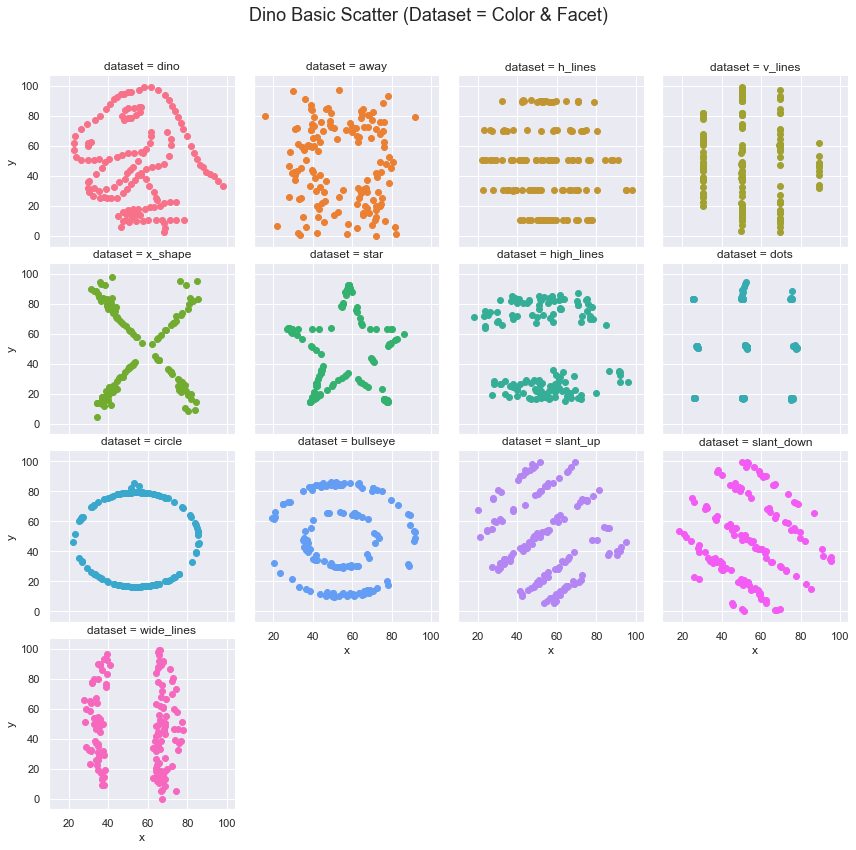

In [10]:
# building an X, Y scatterplot facetted by the dataset label
# because plotly express doesn't yet natively wrap facets, we'll turn to Seaborn for this

# create a facet grid by columns, where the facets wrap after 4 subplots
dino_scatter_facet = (
    sns.FacetGrid(
        dino_df, 
        col = "dataset", 
        col_wrap = 4, 
        hue = "dataset")
)
# adding the charts to the facet grid
dino_scatter_facet = (
    dino_scatter_facet
    # map over the subplots and make scatterplots on X and Y
    .map(plt.scatter, "x", "y")
    # adjust the whitespace for added visibility
    .fig.subplots_adjust(wspace=.1, hspace=.1)
)
# adding a chart title and output in-line
plt.subplots_adjust(top=0.9)
plt.suptitle('Dino Basic Scatter (Dataset = Color & Facet)', fontsize=18);

As we can see above, our "Dino Dozen" dataset has 13 series! There is a python [0-based indexing joke](http://python-history.blogspot.com/2013/10/why-python-uses-0-based-indexing.html) to be made here, but I'm too lazy to do it! 

In the examples above, we saw the same dataset but with the "dataset" column's information encoded in a variety of ways. Namely, the different values for "dataset" were encoded via:

- color
- mark type (aka symbol)
- facet and color

I hope that most of you agree with me when I say that I personally found the facetted chart to be the most helpful in terms of displaying information that I had previously not been able to glean from the summary stats alone, but why exactly was encoding the categorical label for these data via facets (and to a smaller extent color as well) more helpful than, say, just using different mark types? For that, we'll turn to explore some broader principles of data visualization that will help us explain what we can already grasp intuitively.

### A few principles and heuristics of visualization.

**Note:** credit for the visuals and references in this section go exclusively to the aforementioned PyCon 2019 talk by [Jake VanderPlas](https://twitter.com/jakevdp?lang=en)

Whenever discussing data visualization, a great place to start is Leland Wilkinson's seminal book on the grammar of graphics. 

---

<img src="../media/leland_wilkinson_grammarofgraphics.jpg" width="600" height="100">

---

In the book, Leland goes over the "building blocks of visualization," which we can examine using the previous facetted dino dozen visualization as our example, seeing how we used each of the "building blocks" in constructing our viz. 

- Data
    - This was our base `dino_df` dataset, which had a dataset categorical label, along with X and Y continuous data.
- Transformation
    - We didn't need to do any transformations because our data were already in [tidy format](https://vita.had.co.nz/papers/tidy-data.pdf), but this is seldom the case.
- Marks
    - Here we used a scatterplot (i.e. circles) as our mark-type. 
- Encoding
    - We encoded X and Y positionally and then encoded the dataset label two ways: by facet (position) and color. 
- Scale
    - Our facets enabled us to use shared scales on the X and Y axes.
- Guides
    - For guides we labeled each of the facets with the corresponding dataset name, and also included a main chart title. 

Within the above "building blocks", I find encoding to be the most richly complicated. The dino dozen dataset exercise above essentially involved exploring the relative effectiveness of different encodings, and what we arrived at by trial and error and feel has also been explored academically by many, including in [Jacques Bertin's book: *Semiology of Graphics*](https://www.amazon.com/Semiology-Graphics-Diagrams-Networks-Maps/dp/1589482611). In Bertin's book, he explores what he calls "les variables de l'image" -- differently put, "the components of an image". 

---

<img src="../media/bertins_components_of_image.jpg" width="800" height="100">

---

For those who don't know French, or just those looking for a synthesis of the above, Jake VanderPlas assembled this useful visual below to help us go from Bertin's semiology to a simpler set of heuritistics.

---

<img src="../media/jakes_bertin_levelsoforg.jpg" width="600" height="100">

---

As the above describes, various types of encodings are better suited for communicating different types of information. While neither Bertin or VanderPlas' lists are exhaustive or irrefutable, they are helpful heuristics for choosing how to encode our data visually, particularly when we don't have an intuitive feel for it. 

In summary, before starting work on a visualization, recall the principles and heuristics explored here, and ask yourself this one synoptic guiding question:

> What building blocks of visualization should I emphasize to call attention to the pertinent information in a clear and powerful manner?

### Dissection of a visualization: building blocks of visualization explored through two examples.

Now that we have explored the building blocks of visualization and learned some heuristics to help us with best practices, let's apply this to an example use case.

Imagine that one of our risk managers wants to understand the FICO distributions of a handful of lenders. They've also added that all they really care about is understanding the relative distributional differences: i.e., how does lender 1's distribution differ from lender 2's, and so on. For the sake of this analysis, we'll just (arbitrarily) pick the top 3 lenders by January 2017 origination volume. 

How might you go about visualizing these distributional differences? We'll start with an example of a mediocre visualization that, while helpful, is likely not optimal given the ask. Then we'll proceed to a better visualization that more powerfully and clearly communicates the information we want. 

In [11]:
# pre-visualization data prep:
# creating a df with just the january origination volume of our top 3 lenders by volume in that month

# filtering to just january acquisitions and dropping "OTHER" sellers
jan_originations_only = main_df.loc[(main_df['orig_dte'] == '01/2017') & (main_df['seller_name'] != 'OTHER'),:]

# getting the top 3 lenders by volume
top_3_lenders = (
    jan_originations_only
    .groupby('seller_name')
    .size()
    .reset_index(name='counts')
    .sort_values('counts', ascending=False)
    .head(3)
)['seller_name']

# making a df of just the records from the top 3 lenders by volume, keeping just the needed columns: seller name and FICO
top_3_lenders_jan_origs_df = jan_originations_only.loc[main_df['seller_name'].isin(top_3_lenders),['seller_name','cscore_min']]

# inspecting the data we'll be working with for this example
top_3_lenders_jan_origs_df.head()

,seller_name,cscore_min
2803,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",724.0
3208,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",744.0
8514,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",695.0
10496,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",738.0
10788,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",701.0


Below is an example of a mediocre 1st pass at the visualization problem described above. For this viz. I'll make use of the [Plotly Express](https://plot.ly/python/plotly-express/) package (more on this later; the purpose of this section isn't to focus on package-specific idosyncracies) to make 3 FICO histograms--one for each seller. 

- Some of the weaknesses of this viz include:
    - All of the "sloppy" legend work:
        - lack of title
        - sloppy labels (facets, x-axis, y-axis)
    - Use of histogram (counts) makes it harder to compare the overall FICO distributions because volume differences can be distracting.
    - Use of facets complicates comparisons by forcing "bouncing eyes".

In [12]:
# medicore example -- facetted histogram:

# creates a histogram facetted by seller with Plotly Express
lender_fico_hist = px.histogram(
    data_frame = top_3_lenders_jan_origs_df,
    x = 'cscore_min',
    color = 'seller_name',
    facet_col = 'seller_name',
    height = 600,
    width = 900
)

# dropping the color legend
lender_fico_hist.update(
    layout_showlegend=False,
)
iplot(lender_fico_hist)

In [13]:
# saving out the px figure; I'm doing this in a separate cell because saving plotly figures requires orca, which some might not have
# for details on how to get orca working, see: https://medium.com/@plotlygraphs/plotly-py-end-of-summer-updates-5422c98b9058
# going to comment out the below giving that it is the trickiest package to deal with, but this is how it works
# pio.write_image(lender_fico_hist, file='../media/fico_seller_hist_plot.png')

Below is an example of a crisper representation of the data in our use case. I'll make use of a kernel density plot ([aka PDF](https://en.wikipedia.org/wiki/Probability_density_function)), which is a great chart type if you care about looking at the overall shape of distributions. For now, it's not important to fully understand the math behind the smoothing visible in the KDE plot, but if you're interested, check out [this explanation of the meaning of the y-axis](https://stats.stackexchange.com/questions/48109/what-does-the-y-axis-in-a-kernel-density-plot-mean), as well as this [overall explanation of KDE plots](https://www.homeworkhelponline.net/blog/math/tutorial-kde). The quick tl;dr is that if you pick two points along the x-axis, the area under the curve between them is the probabilty of finding a value in that range (or in empirical cases, the actual observed rate of occurence of a value in that range), but again, given the stated problem in this use case, those details are less important than the overall shape of the distributions. 

- Some of the strengths of this viz include:
    - The use of color hue makes it easy to differentiate between sellers at a glance.
    - The lack of facets and shared scale facilitates relative comparisons of the distributions by avoiding "bouncing eyes".
    - The choice of a KDE plot as the mark type removes the noise inherent to a histogram / binning bias. 

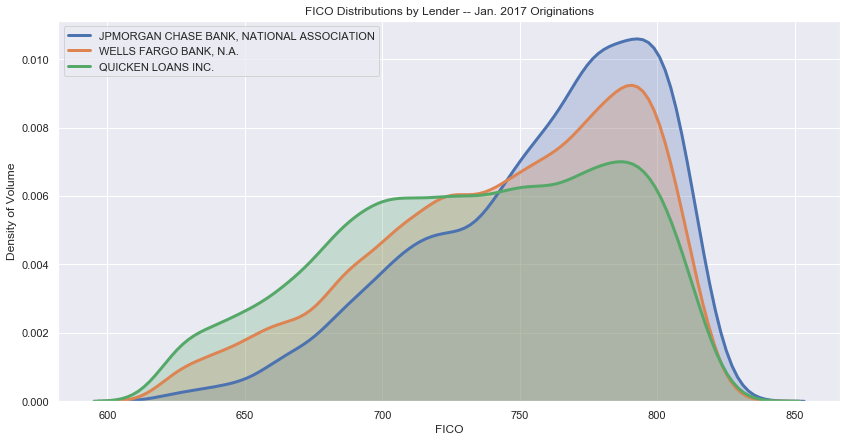

In [14]:
# higher-quality viz. example -- overlayed KDE plot:

# setting our figure size
plt.figure(figsize=(14, 7))

# plotting one KDE plot for each seller
for seller in top_3_lenders_jan_origs_df['seller_name'].unique() :
    fico_dist_ax = sns.distplot(
        top_3_lenders_jan_origs_df.loc[top_3_lenders_jan_origs_df['seller_name']== seller,'cscore_min'],
        hist = False,
        kde = True,
        kde_kws = {
            'shade': True,
            'linewidth':3
        },
        label = seller
    )
;

# setting the axes labels and title and displaying in-line
fico_dist_ax.set(
    xlabel="FICO", 
    ylabel="Density of Volume", 
    title ="FICO Distributions by Lender -- Jan. 2017 Originations"
);

# saving out the plot
plt.savefig(fname = '../media/fico_seller_dist_plot.png')

**When ready for the next section of content, proceed to `part_2_main_nb.ipynb`**